# Proyecto Data Science

**Abstract:** El objetivo de este trabajo consiste en analizar ciertas variables climáticas de la ciudad de Washington, en el intervalo temporal desde el año 2015 hasta el año 2024. Para ello se dispone de un dataset de 33 columnas y 3319 filas, donde cada fila contiene la información de las distintas variables climáticas concernientes a un solo día, y cada columna contiene la información diaria a través de los años de una dada variable climática. Para este trabajo, las variables climáticas de interés son la temperatura (en grados centígrados), la humedad relativa (en porcentaje) y las precipitaciones (en milímetros). El dataset en cuestión será convertido en un DataFrame mediante la librería Pandas.
Primero vamos a focalizarnos en encontrar algún tipo de correlación entre las variables citadas mediante el análisis de gráficos de dispersión, y luego vamos a estudiar la evolución temporal del promedio de las tres variables a lo largo de los años utilizando gráficos de barras. Para esta segunda parte, vamos a agregar una última columna al DataFrame que contemple solo el año, lo cual nos permitirá realizar los gráficos necesarios para el análisis. Los distintos gráficos tanto de dispersión como de barras se realizarán con las librerías Matplotlib y Pandas.


In [1]:
# Importar las librerías necesarias usando sus respectivas alias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer el archivo CSV a analizar

df = pd.read_csv('dc_weather.csv')
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2015-08-01,33.1,22.8,28.2,34.0,22.8,28.6,17.4,53.3,...,22.9,8,NaN,2015-08-01T06:08:52,2015-08-01T20:19:30,0.54,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KIAD,KDCA,72405013743,72403793728,72403093738,..."
1,"Washington,DC,USA",2015-08-02,32.0,22.8,27.3,31.1,22.8,27.2,15.4,49.1,...,22.4,8,NaN,2015-08-02T06:09:44,2015-08-02T20:18:29,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KIAD,KDCA,72405013743,72403793728,72403093738,..."
2,"Washington,DC,USA",2015-08-03,33.2,21.8,27.9,34.9,21.8,28.7,18.6,58.7,...,24.1,9,NaN,2015-08-03T06:10:38,2015-08-03T20:17:26,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
3,"Washington,DC,USA",2015-08-04,35.3,24.9,29.3,36.6,24.9,30.4,19.0,55.2,...,21.9,9,NaN,2015-08-04T06:11:31,2015-08-04T20:16:22,0.65,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
4,"Washington,DC,USA",2015-08-05,33.6,24.0,28.6,33.0,24.0,28.6,17.6,55.3,...,23.7,9,NaN,2015-08-05T06:12:24,2015-08-05T20:15:16,0.68,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KDCA,72405013743,72403793728,KGAI,KADW,KDAA,72..."


In [3]:
# Mostrar información general del DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319 entries, 0 to 3318
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3319 non-null   object 
 1   datetime          3319 non-null   object 
 2   tempmax           3319 non-null   float64
 3   tempmin           3319 non-null   float64
 4   temp              3319 non-null   float64
 5   feelslikemax      3319 non-null   float64
 6   feelslikemin      3319 non-null   float64
 7   feelslike         3319 non-null   float64
 8   dew               3319 non-null   float64
 9   humidity          3319 non-null   float64
 10  precip            3319 non-null   float64
 11  precipprob        3319 non-null   int64  
 12  precipcover       3319 non-null   float64
 13  preciptype        1530 non-null   object 
 14  snow              3319 non-null   float64
 15  snowdepth         3319 non-null   float64
 16  windgust          3319 non-null   float64


In [4]:
# Agregamos una última columna con el año al DataFrame

df['year'] = df['datetime'].str.slice(0, 4).astype(dtype = 'int')

In [5]:
# Mostrar información general del DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319 entries, 0 to 3318
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3319 non-null   object 
 1   datetime          3319 non-null   object 
 2   tempmax           3319 non-null   float64
 3   tempmin           3319 non-null   float64
 4   temp              3319 non-null   float64
 5   feelslikemax      3319 non-null   float64
 6   feelslikemin      3319 non-null   float64
 7   feelslike         3319 non-null   float64
 8   dew               3319 non-null   float64
 9   humidity          3319 non-null   float64
 10  precip            3319 non-null   float64
 11  precipprob        3319 non-null   int64  
 12  precipcover       3319 non-null   float64
 13  preciptype        1530 non-null   object 
 14  snow              3319 non-null   float64
 15  snowdepth         3319 non-null   float64
 16  windgust          3319 non-null   float64


In [6]:
# Descripción estadística de las columnas numéricas

df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,year
count,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,...,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,965.000000,3319.000000,3319.000000
mean,20.268786,11.538626,15.656945,20.401115,10.055499,15.006990,8.302561,64.390419,3.007737,41.940343,...,197.330310,1017.678548,63.506418,15.273245,130.861525,11.282314,5.477553,16.336788,0.483769,2019.622477
std,9.510945,8.974636,9.046560,10.979349,10.718880,10.603307,9.993731,14.099776,8.048340,49.353580,...,102.550771,6.883928,23.573365,1.583775,78.961594,6.828585,2.593175,15.458939,0.288618,2.651780
min,-6.800000,-13.000000,-9.700000,-15.100000,-20.700000,-17.300000,-22.400000,19.800000,0.000000,0.000000,...,0.100000,992.500000,0.000000,1.600000,2.900000,0.100000,0.000000,5.000000,0.000000,2015.000000
25%,12.400000,3.800000,8.000000,12.400000,1.000000,6.400000,0.200000,54.500000,0.000000,0.000000,...,121.800000,1013.200000,47.200000,15.400000,66.950000,5.700000,4.000000,10.000000,0.250000,2017.000000
50%,21.100000,11.500000,15.900000,21.100000,11.500000,15.900000,9.300000,64.500000,0.000000,0.000000,...,191.300000,1017.400000,65.500000,16.000000,116.800000,10.100000,6.000000,10.000000,0.500000,2020.000000
75%,28.600000,19.900000,24.000000,28.900000,19.900000,24.100000,17.100000,74.800000,1.335000,100.000000,...,298.150000,1022.000000,82.400000,16.000000,191.850000,16.600000,8.000000,10.000000,0.750000,2022.000000
max,39.300000,27.500000,32.700000,45.500000,31.500000,38.300000,24.800000,97.900000,101.672000,100.000000,...,358.900000,1040.700000,100.000000,16.000000,548.100000,47.400000,10.000000,100.000000,0.980000,2024.000000


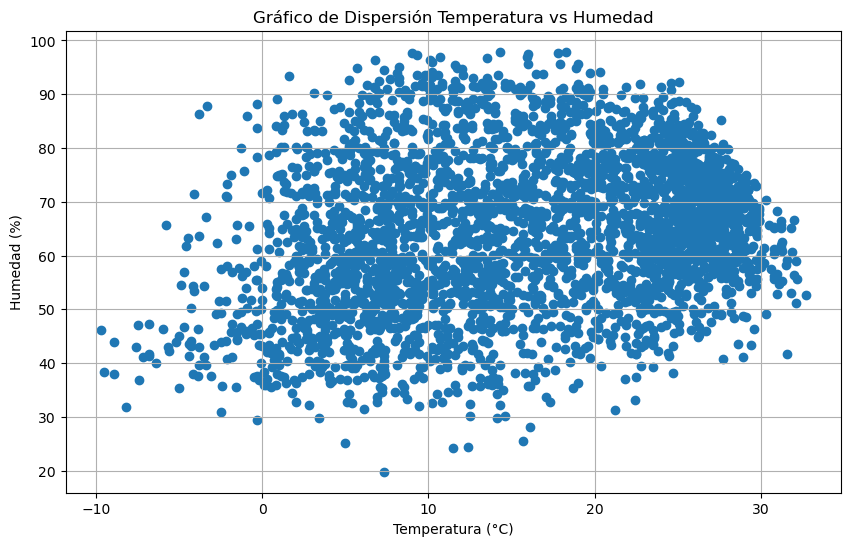

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(df['temp'],df['humidity'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Humedad (%)')
plt.title('Gráfico de Dispersión Temperatura vs Humedad')
plt.grid(True)
plt.show()

De este gráfico podemos concluir que no existe una correlación clara entre la temperatura y la humedad relativa ya que la dispersión de puntos es de un tamaño tal que no es posible distinguir algún patrón o comportamiento que relacione a ambas variables.

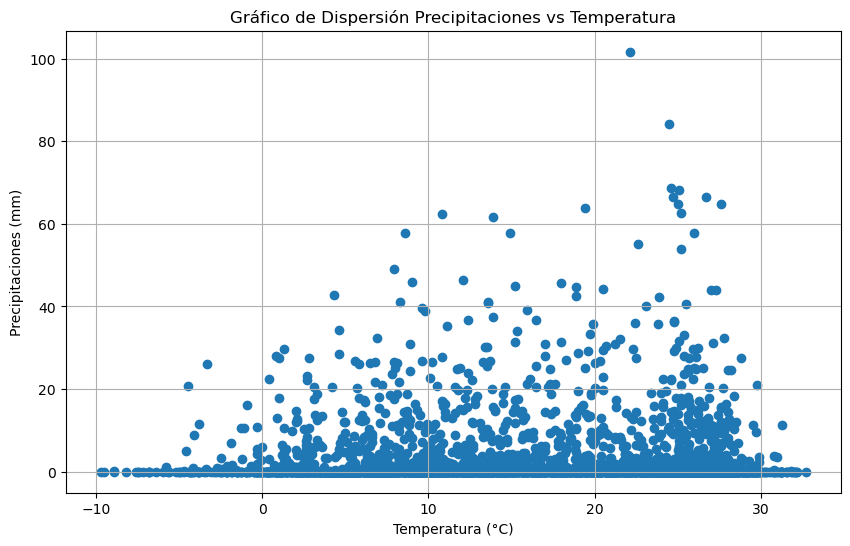

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df['temp'],df['precip'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Precipitaciones (mm)')
plt.title('Gráfico de Dispersión Precipitaciones vs Temperatura')
plt.grid(True)
plt.show()

En este gráfico se puede apreciar un leve aumento de las precipitaciones promedio a medida que aumenta la temperatura.

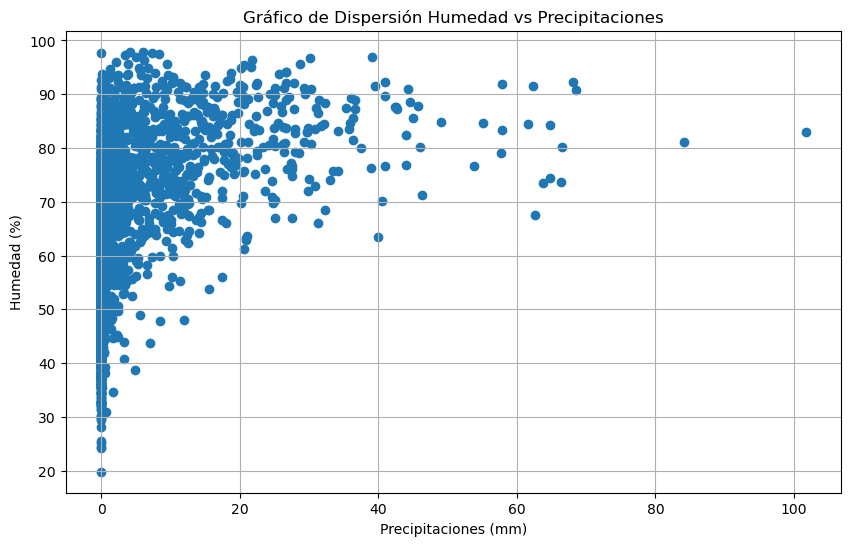

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['precip'],df['humidity'])
plt.xlabel('Precipitaciones (mm)')
plt.ylabel('Humedad (%)')
plt.title('Gráfico de Dispersión Humedad vs Precipitaciones')
plt.grid(True)
plt.show()

A partir de este gráfico queda bastante claro que existe una clara relación entre la humedad y las precipitaciones. En efecto, a medida que aumenta la humedad relativa, no solo se tienen bajas precipitaciones, sino que además aumentan las altas precipitaciones.

In [10]:
temp_media_anual_serie = df.groupby('year')['temp'].mean()
temp_media_anual_serie

year
2015    17.164706
2016    15.403552
2017    15.678904
2018    15.064932
2019    15.512055
2020    15.561475
2021    15.516712
2022    14.932603
2023    15.868219
2024    17.281557
Name: temp, dtype: float64

In [11]:
type(temp_media_anual_serie)

pandas.core.series.Series

In [12]:
temp_media_anual_dataframe=pd.DataFrame(temp_media_anual_serie)
temp_media_anual_dataframe

,temp
year,
2015,17.164706
2016,15.403552
2017,15.678904
2018,15.064932
2019,15.512055
2020,15.561475
2021,15.516712
2022,14.932603
2023,15.868219


In [13]:
temp_media_anual_dataframe.reset_index(inplace=True) # Resetear los índices en el mismo archivo 
temp_media_anual_dataframe

,year,temp
0,2015,17.164706
1,2016,15.403552
2,2017,15.678904
3,2018,15.064932
4,2019,15.512055
5,2020,15.561475
6,2021,15.516712
7,2022,14.932603
8,2023,15.868219
9,2024,17.281557


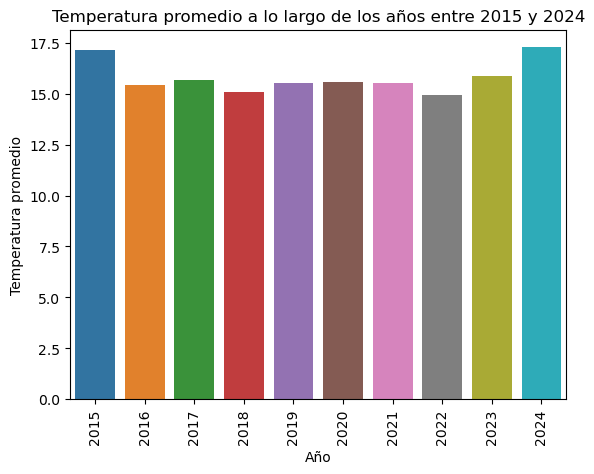

In [14]:
# Gráfico de la temperatura promedio entre los años 2015 y 2024

sns.barplot(x='year', y='temp', data=temp_media_anual_dataframe)
plt.xlabel('Año')
plt.ylabel('Temperatura promedio')
plt.title('Temperatura promedio a lo largo de los años entre 2015 y 2024')
plt.xticks(rotation=90)
plt.show()

De este gráfico de barras podemos inferir una leve disminución de la temperatura promedio al principio del 2015 al 2016, para luego permanecer relativamente estable, y empezar a crecer en los últimos tres años.

In [15]:
humedad_media_anual_serie = df.groupby('year')['humidity'].mean()
humedad_media_anual_serie

year
2015    69.067974
2016    64.498634
2017    65.191233
2018    65.912877
2019    63.336164
2020    66.548907
2021    62.770959
2022    62.575616
2023    63.589041
2024    62.495082
Name: humidity, dtype: float64

In [16]:
type(humedad_media_anual_serie)

pandas.core.series.Series

In [17]:
humedad_media_anual_dataframe=pd.DataFrame(humedad_media_anual_serie)
humedad_media_anual_dataframe

,humidity
year,
2015,69.067974
2016,64.498634
2017,65.191233
2018,65.912877
2019,63.336164
2020,66.548907
2021,62.770959
2022,62.575616
2023,63.589041


In [18]:
humedad_media_anual_dataframe.reset_index(inplace=True) # Resetear los índices en el mismo archivo 
humedad_media_anual_dataframe

,year,humidity
0,2015,69.067974
1,2016,64.498634
2,2017,65.191233
3,2018,65.912877
4,2019,63.336164
5,2020,66.548907
6,2021,62.770959
7,2022,62.575616
8,2023,63.589041
9,2024,62.495082


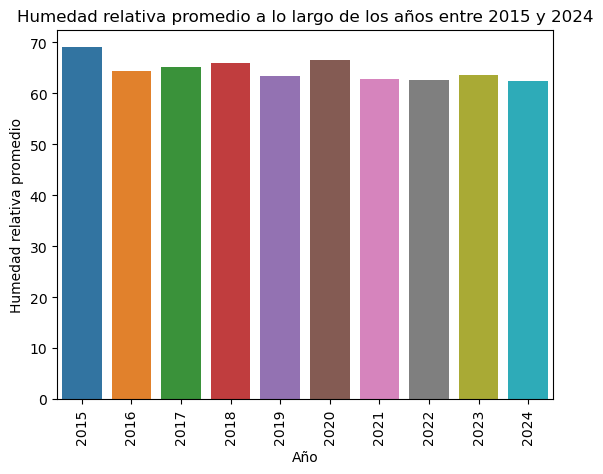

In [19]:
# Gráfico de la humedad relativa promedio entre los años 2015 y 2024

sns.barplot(x='year', y='humidity', data=humedad_media_anual_dataframe)
plt.xlabel('Año')
plt.ylabel('Humedad relativa promedio')
plt.title('Humedad relativa promedio a lo largo de los años entre 2015 y 2024')
plt.xticks(rotation=90)
plt.show()

Si bien de este gráfico se puede concluir que existe cierta estabilidad en la humedad relativa con el correr de los años, el mismo gráfico induce sospechas de existir una leve disminución de la humedad relativa a medida que pase el tiempo, la cual se puede constatar con un análisis de los datos más detallado.

In [20]:
precip_media_anual_serie = df.groupby('year')['precip'].mean()
precip_media_anual_serie

year
2015    2.390830
2016    2.263120
2017    2.533529
2018    4.847044
2019    2.941630
2020    4.027902
2021    3.017786
2022    2.667849
2023    2.263162
2024    2.645299
Name: precip, dtype: float64

In [21]:
type(precip_media_anual_serie)

pandas.core.series.Series

In [22]:
precip_media_anual_dataframe=pd.DataFrame(precip_media_anual_serie)
precip_media_anual_dataframe

,precip
year,
2015,2.390830
2016,2.263120
2017,2.533529
2018,4.847044
2019,2.941630
2020,4.027902
2021,3.017786
2022,2.667849
2023,2.263162


In [23]:
precip_media_anual_dataframe.reset_index(inplace=True) # Resetear los índices en el mismo archivo 
precip_media_anual_dataframe

,year,precip
0,2015,2.390830
1,2016,2.263120
2,2017,2.533529
3,2018,4.847044
4,2019,2.941630
5,2020,4.027902
6,2021,3.017786
7,2022,2.667849
8,2023,2.263162
9,2024,2.645299


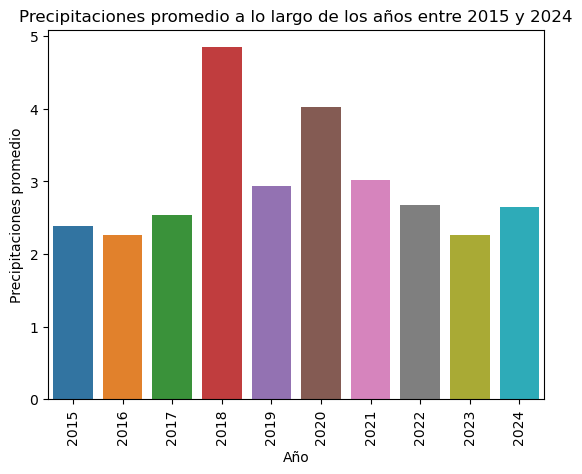

In [24]:
# Gráfico de las precipitaciones promedio entre los años 2015 y 2024

sns.barplot(x='year', y='precip', data=precip_media_anual_dataframe)
plt.xlabel('Año')
plt.ylabel('Precipitaciones promedio')
plt.title('Precipitaciones promedio a lo largo de los años entre 2015 y 2024')
plt.xticks(rotation=90)
plt.show()

Finalmente, gracias a este gráfico podemos concluir que las lluvias se mantienen dentro del rango de 2mm a 3mm, con dos años excepcionales, 2018 y 2020, ambos con precipitaciones de 4mm o más. 